<div id="theory"><h2>Pendahuluan</h2><p>Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.</p>
<p>Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu <a href="https://covid19-api.org/">https://covid19-api.org/</a>.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Library yang dibutuhkan</h2><p>Pertama-tama, import terlebih dahulu library yang dibutuhkan, antara lain secara berurutan adalah</p>
<ul>
<li>json,</li>
<li>numpy,</li>
<li>pandas, dan</li>
<li>requests.</li>
</ul>
<p>Library numpy dan pandas diimport sebagai aliasnya.</p>
<p>&nbsp;</p>

In [1]:
import json
import numpy as np
import pandas as pd
import requests

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Membuat Fungsi get API</h2><p>Buat fungsi python <strong>get_json</strong> dengan parameter <strong>api_url</strong>. fungsi ini akan mengembalikan value berupa python dictionary jika <strong>status_code</strong> yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah <strong>None</strong>.</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [2]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Memanggil API Covid19</h2><p>Rekapitulasi data COVID-19 global berada di <a href="https://covid19-api.org/">https://covid19-api.org/</a>. Gunakan parameter record_date untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, gunakan record_date '2020-08-17', dan masukkan hasil respon api ke variable df_covid_worldwide.</p>
<p>Untuk mendapatkan dataframe covid19, gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json() Print sample data covid dengan menggunakan head() function.</p>
<p>&nbsp;</p>

In [3]:
record_date = '2020-08-31'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-30T23:28:28  5993668  183034    2153939
1      BR  2020-08-30T23:28:28  3846153  120462    3202185
2      IN  2020-08-30T23:28:28  3542733   63498    2713933
3      RU  2020-08-30T23:28:28   987470   17045     804941
4      PE  2020-08-30T23:28:28   639435   28607     446675


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Merubah Format date</h2><p>Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format <strong>YYYY-mm-dd HH:MM:SS</strong>. Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.</p>
<p>&nbsp;</p>

In [4]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format= "%Y-%m-%d %H:%M:%S")
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())
print(df_covid_worldwide)

    country last_update    cases  deaths  recovered
0        US  2020-08-30  5993668  183034    2153939
1        BR  2020-08-30  3846153  120462    3202185
2        IN  2020-08-30  3542733   63498    2713933
3        RU  2020-08-30   987470   17045     804941
4        PE  2020-08-30   639435   28607     446675
..      ...         ...      ...     ...        ...
201      GG  2020-03-17        0       0          0
202      GL  2020-03-19        0       0          0
203      GU  2020-03-18        0       0          0
204      JE  2020-03-17        0       0          0
205      PR  2020-03-17        0       0          0

[206 rows x 5 columns]


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Mengambil Data Countries</h2><p>Buatlah dataframe countries dengan memanggil variable countries_url ke api covid19-api.org. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.</p>
<p>Akhirnya cetaklah lima data teratas dari dataframe countries (df_countries).</p>

In [5]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

df_countries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,country
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO
...,...,...
201,Viet Nam,VN
202,Western Sahara,EH
203,Yemen,YE
204,Zambia,ZM


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Merge Covid19 Data dan Countries</h2><p>Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().</p>

In [6]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-30  5993668  183034    2153939  United States of America
1      BR  2020-08-30  3846153  120462    3202185                    Brazil
2      IN  2020-08-30  3542733   63498    2713933                     India
3      RU  2020-08-30   987470   17045     804941        Russian Federation
4      PE  2020-08-30   639435   28607     446675                      Peru


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Menghitung Fatality Rate</h2><p>Tambahkan satu kolom tambahan yaitu fatality_rate, yang merupakan pembagian antara kolom deaths dan cases.</p>

In [7]:
df_covid_denormalized['fatality_rate'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Negara-negara dengan Fatality Rate Tertinggi</h2><p>Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.</p>

In [8]:
df_top_10_fatality_rate = df_covid_denormalized.sort_values(by='fatality_rate', ascending=False).head(10)
df_top_10_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_rate
139,YE,2020-08-30,1953,564,1123,Yemen,0.288786
18,IT,2020-08-30,268218,35477,208536,Italy,0.132269
12,GB,2020-08-30,336641,41586,1624,United Kingdom of Great Britain and Northern I...,0.123532
37,BE,2020-08-30,84599,9891,18403,Belgium,0.116916
7,MX,2020-08-30,591712,63819,484283,Mexico,0.107855
104,HU,2020-08-30,5961,614,3759,Hungary,0.103003
191,EH,2020-08-30,10,1,8,Western Sahara,0.100000
13,FR,2020-08-30,315813,30611,86495,France,0.096928
40,NL,2020-08-30,72679,6252,986,Netherlands,0.086022
156,TD,2020-08-30,1012,77,878,Chad,0.076087


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Import Library Visualisasi</h2><p>Importlah library matplotlib.pyplot sebagai aliasnya plt.</p>

In [9]:
import matplotlib.pyplot as plt

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Visualisasi Negara dengan Fatality Rate Tertinggi</h2><p>Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.&nbsp; Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.</p>
<p>Variabel x axis adalah kolom <strong>name</strong>, dan kolom y atau value nya adalah kolom <strong>fatality_rate</strong> dan gunakan fungsi plt.bar([value x axis, value y axis]).</p>
<p>Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.</p>

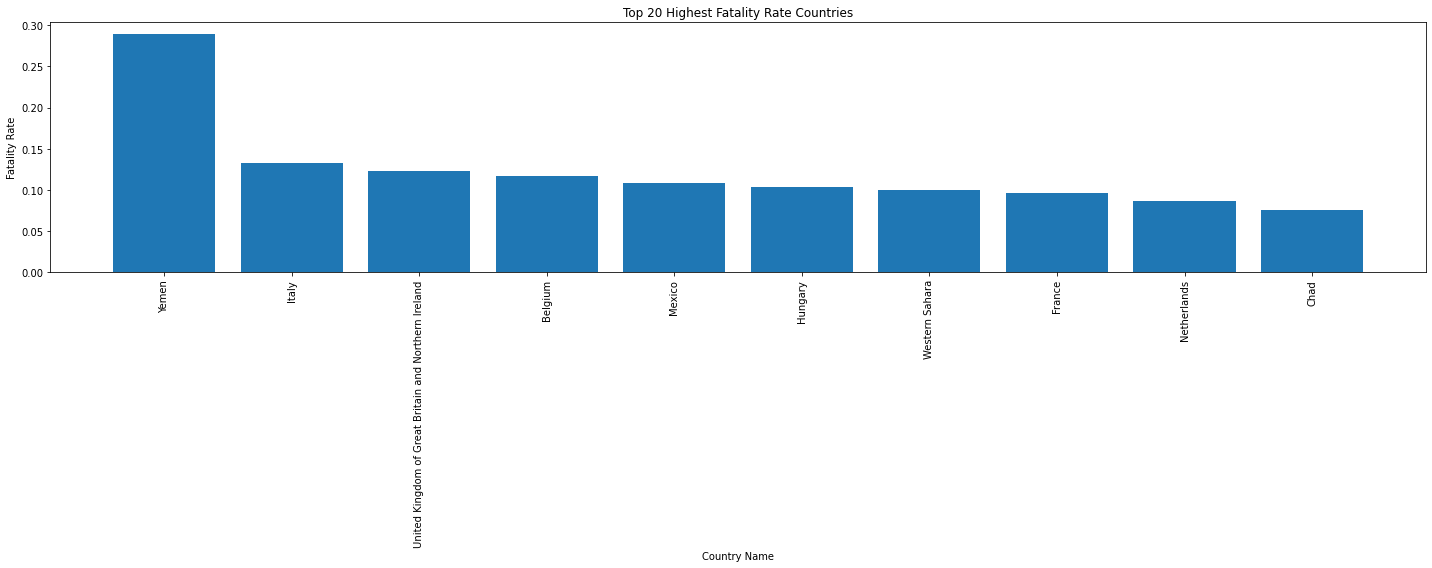

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_10_fatality_rate['name']
y = df_top_10_fatality_rate['fatality_rate']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Menggabungkan Dataframe</h2><p>Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:</p>
<ul>
<li>MY -&gt; Malaysia,</li>
<li>SG -&gt; Singapure,</li>
<li>TH -&gt; Thailand,</li>
<li>VN -&gt; Vietnam.</li>
<li>BN -&gt; Malaysia,</li>
<li>MM -&gt; Myanmar,</li>
<li>KH -&gt; Kambodja,</li>
<li>PH -&gt; Filipina.</li>
<li>LA -&gt; Laos.</li>
<li>ID -&gt; Indonesia.</li>
</ul>
<p>Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.</p>
<p>Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().</p>
<p>Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.</p>
<p>Cetaklah lima data teratas dari dataframe yang telah dibentuk.</p>

In [11]:
countries = ['ID','BN','MY','KH','SG','TH','VN','LA','MM','PH']

# names = ['Indonesia', Brunei Darussalam','Malaysia','Cambodia','Singapore',
#          'Thailand','Viet Nam',"Lao People's Democratic Republic", 'Myanmar', 'Philippines']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1
    
print(df_covid_timeline_merged.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


  country last_update   cases  deaths  recovered
0      PH  2020-08-31  220819    3558     157562
1      PH  2020-08-30  217396    3520     157403
2      PH  2020-08-29  213131    3419     135101
3      PH  2020-08-28  209544    3325     134474
4      PH  2020-08-27  205581    3234     133990


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Merge Data Covid19 Dengan Data Country</h2><p>Lalu gabungkan df_covid_timeline_merged dengan df_countries dengan kolom country sebagai pivot.</p>

In [12]:
df_covid_timeline_denormalized = pd.merge( df_covid_timeline_merged, df_countries, on='country')
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,PH,2020-08-31,220819,3558,157562,Philippines
1,PH,2020-08-30,217396,3520,157403,Philippines
2,PH,2020-08-29,213131,3419,135101,Philippines
3,PH,2020-08-28,209544,3325,134474,Philippines
4,PH,2020-08-27,205581,3234,133990,Philippines
...,...,...,...,...,...,...
1847,ID,2020-03-10,27,0,2,Indonesia
1848,ID,2020-03-09,19,0,0,Indonesia
1849,ID,2020-03-08,6,0,0,Indonesia
1850,ID,2020-03-06,4,0,0,Indonesia


<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Kasus Covid-19 di ASEAN pada Bulan Maret 2020</h2><p>Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yangdiambil. Format datetime.date menggunakan format YYYY, mm, dd.</p>

In [13]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]
df_covid_timeline_denormalized.country.value_counts()

MY    181
SG    181
TH    180
ID    178
PH    178
VN    177
BN    175
KH    172
LA    161
MM    158
Name: country, dtype: int64

<div id="theorycontent" style="overflow-x: scroll; display: block;"><h2>Visualisasi Kasus Covid-19 di ASEAN</h2><p>Buat variable x dan y dimana x adalah tanggal (last_update) pada tiap-tiap negara dan y adalah jumlah kasus (cases) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.</p>

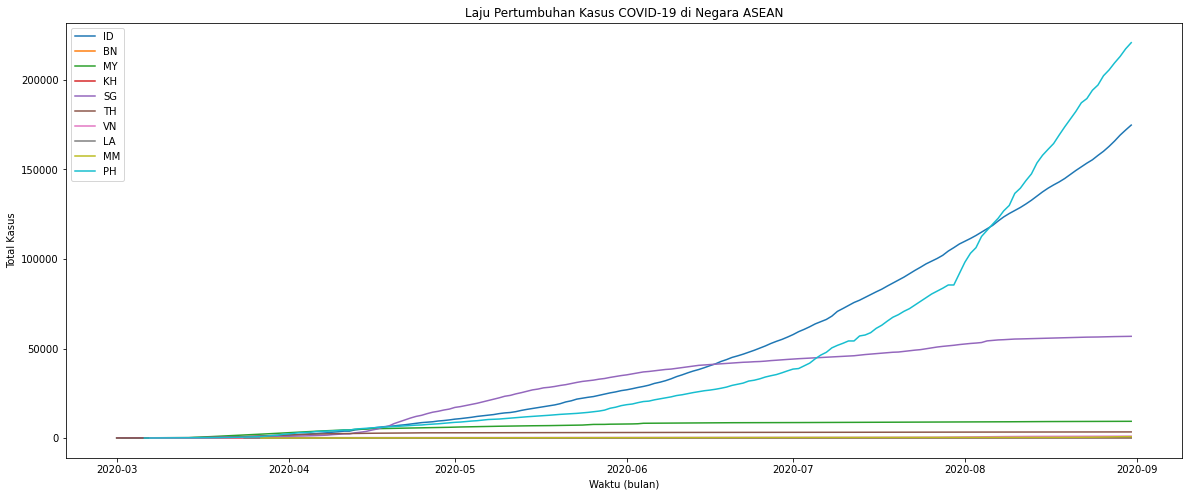

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.clf()

countries = ['ID','BN','MY','KH','SG','TH','VN','LA','MM','PH']
# names = ['Indonesia', 'Malaysia', 'Brunei Darussalam','Malaysia','Cambodia','Singapore',
#          'Thailand','Viet Nam',"Lao People's Democratic Republic", 'Myanmar', 'Philippines']
for country in countries:
	country_data = df_covid_timeline_denormalized['country']==country
	x = df_covid_timeline_denormalized[country_data]['last_update']
	y = df_covid_timeline_denormalized[country_data]['cases']
	plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Waktu (bulan)')
plt.ylabel('Total Kasus')
plt.title('Laju Pertumbuhan Kasus COVID-19 di Negara ASEAN')
plt.show()

In [15]:
df_covid_timeline_denormalized['fatality_rate'] = df_covid_timeline_denormalized['deaths']/df_covid_timeline_denormalized['cases']
df_covid_timeline_denormalized= df_covid_timeline_denormalized.sort_values(by='fatality_rate', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


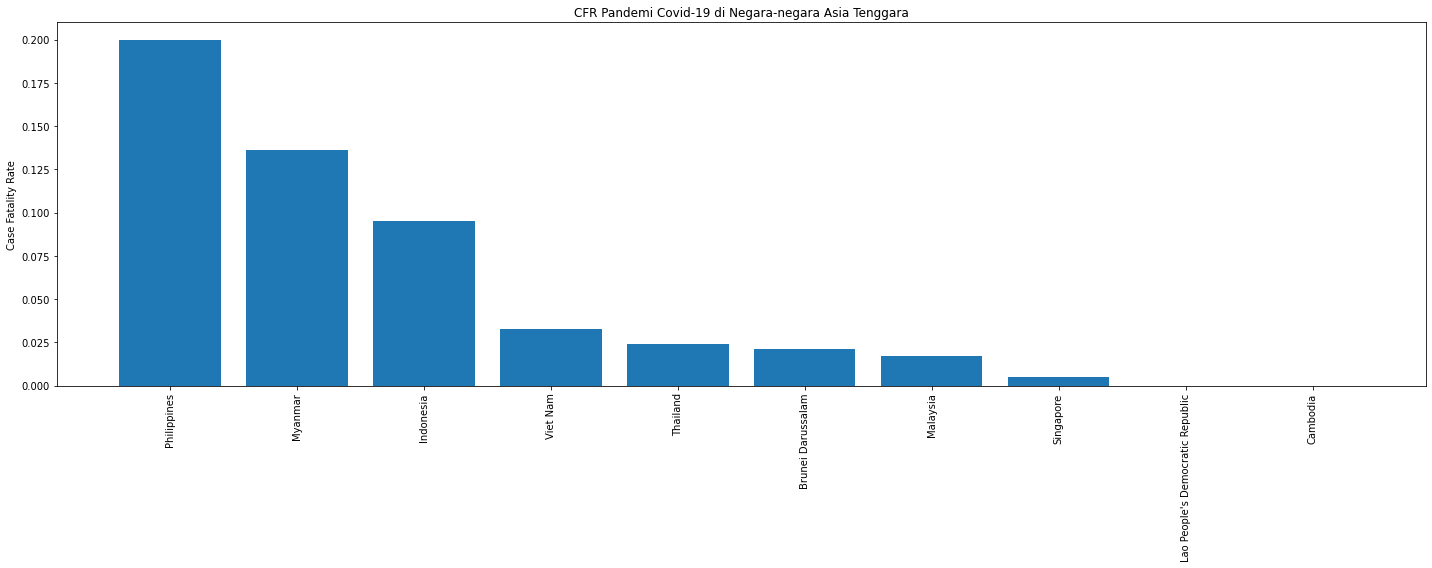

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_covid_timeline_denormalized['name']
y = df_covid_timeline_denormalized['fatality_rate']
plt.bar(x,y)
# plt.xlabel('Negara')
plt.ylabel('Case Fatality Rate')
plt.title('CFR Pandemi Covid-19 di Negara-negara Asia Tenggara')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()